In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from os import listdir
import fitz

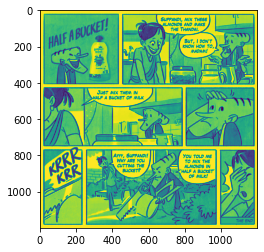

In [2]:
img = cv2.imread("Sample_img.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

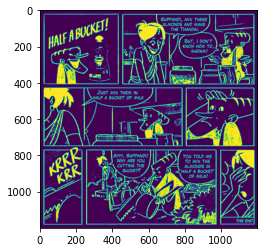

In [3]:
thresh_inv = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
plt.imshow(thresh_inv)

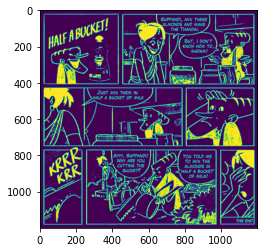

In [4]:
blur = cv2.GaussianBlur(thresh_inv,(1,1),0)
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [5]:
gray.shape

(1200, 1200)

990   770   192   412
252   768   721   414
18   755   216   427
802   427   379   323
19   426   766   324
453   22   728   387
20   21   414   387


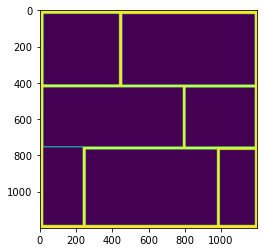

In [6]:
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
mask = np.ones(img.shape[:2], dtype="uint8")*255
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
#     print("Yes")
    if(w*h>1500):
        print(x,' ',y,' ',w,' ',h)
        mask = cv2.rectangle(mask,(x,y),(x+w,y+h),(0,0,255),-1)
plt.imshow(mask)

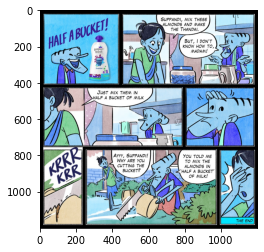

In [7]:
res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))
plt.imshow(res_final)

In [8]:
# img =  cv2.imread('ExFILIKVcAAHOay.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Blur the image
blur = cv2.GaussianBlur(thresh_inv,(1,1),0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# find contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

mask = np.ones(img.shape[:2], dtype="uint8") * 255
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w*h>(img.shape[0]*img.shape[1]/32):
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)

res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))


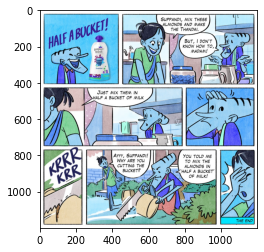

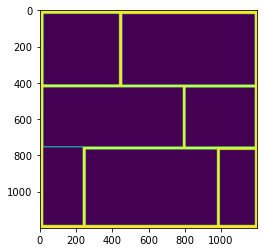

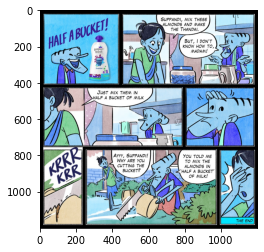

In [9]:
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(res_final)
plt.show()

In [10]:
def maintain_aspect_ratio_resize(image, width=800, height=400, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    
#     if(h>w):
    r = height / float(h)
    width = int(w * r)
    r = width / float(w)
    height = int(h * r)
    dim = (width, height)
        
#     else:
#         r = width / float(w)
#         dim = (width, int(h * r))
    return cv2.resize(image, dim, interpolation=inter)

In [60]:
def ret_boxes(img):
    
    og_img = img
    cv2.imshow('pic',img)
#     img = maintain_aspect_ratio_resize(img,500,500)
    img_array = []
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    print("thresh")
    plt.figure(figsize=(8,8))
    thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU+cv2.THRESH_MASK)[1]
    thresh_inv = maintain_aspect_ratio_resize(thresh_inv,500,500)
    plt.imshow(cv2.cvtColor(thresh_inv,cv2.COLOR_BGR2RGB))
    plt.show()
    
    # Blur the image
    blur = cv2.GaussianBlur(thresh_inv,(5,5),0)

    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    print("canny")
    plt.figure(figsize=(8,8))
    canny = cv2.Canny(thresh,0,255)
    print("max(canny)",np.max(canny))
#     canny=cv2.bitwise_not(canny)
    plt.imshow(cv2.cvtColor(canny,cv2.COLOR_BGR2RGB))
    plt.show()
    
    
    print("dilate")
    plt.figure(figsize=(8,8))
    dilate = cv2.dilate(canny,(3,5),iterations=1)
    plt.imshow(cv2.cvtColor(dilate,cv2.COLOR_BGR2RGB))
    plt.show()
    
    # find contours
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    mask = np.ones(thresh_inv.shape[:2], dtype="uint8") * 255
    for c in contours:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        if w*h>(thresh_inv.shape[0]*thresh_inv.shape[1]/16) :
#             print(x,' ',y,' ',x+w,' ', y+h)
            cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)
            img_array.append(img[y:y+h,x:x+w])
#             plt.imshow(img[y:y+h,x:x+w])
#             plt.show()
    mask = maintain_aspect_ratio_resize(mask,500,500)
    og_img = maintain_aspect_ratio_resize(og_img,500,500)

    res_final = cv2.bitwise_and(og_img, og_img, mask=cv2.bitwise_not(mask))
    
    print("mask")
    plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("result")
    plt.imshow(cv2.cvtColor(res_final,cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.waitKey(3000)
    cv2.destroyAllWindows()
#     return(img_array[::-1])


thresh


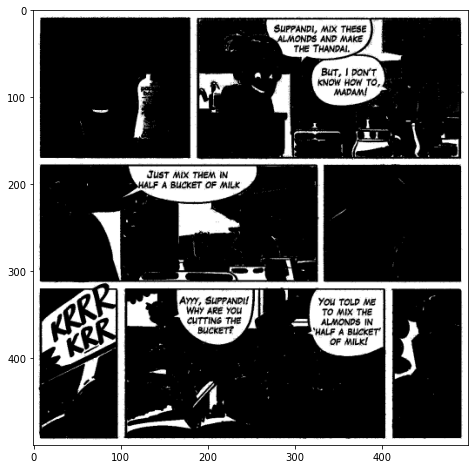

canny
max(canny) 255


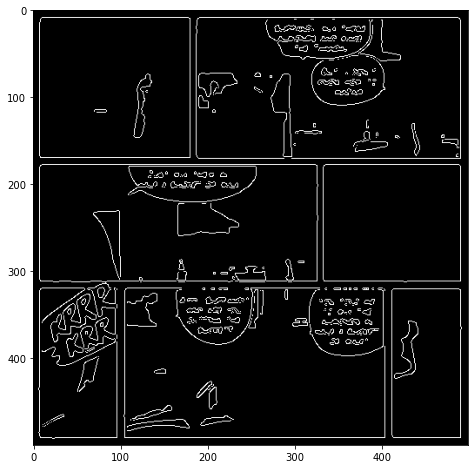

dilate


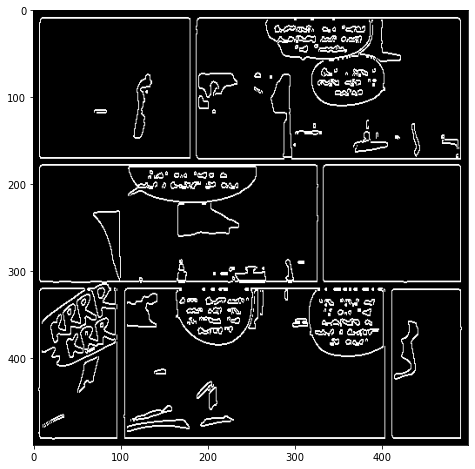

mask


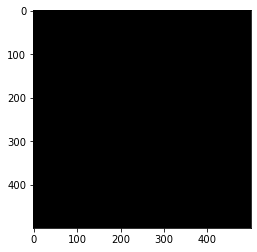

result


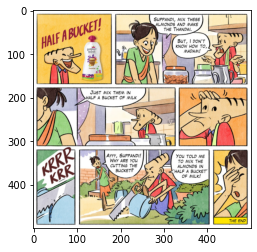

In [61]:
img = cv2.imread('Sample_img.jpg')
ret_boxes(img)

In [15]:
img_dir = "C:/Users/Anirudhan/Anirudhan_Code/Testing/Box detection/Story One"
os.listdir(img_dir)

['1.jpeg', '2.jpeg', '3.jpeg', '4.jpeg', '5.jpeg', '6.jpeg']

In [16]:
img_dir+im

'C:/Users/Anirudhan/Anirudhan_Code/Testing/Box detection/Story One1.jpeg'

In [36]:
def maintain_aspect_ratio_resize(image, width=400, height=500, inter=cv2.INTER_AREA):
    # Grab the image size and initialize dimensions
    dim = None
    (h, w) = image.shape[:2]
    
    if(h>w):
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

#     # Return original image if no need to resize
#     if width is None and height is None:
#         return image

#     # We are resizing height if width is none
#     if width is None:
#         # Calculate the ratio of the height and construct the dimensions
#         r = height / float(h)
#         dim = (int(w * r), height)
#     # We are resizing width if height is none
#     else:
#         # Calculate the ratio of the width and construct the dimensions
#         r = width / float(w)
#         dim = (width, int(h * r))

    # Return the resized image
    return cv2.resize(image, dim, interpolation=inter)

In [37]:
while True:
    temp = gray
    temp = maintain_aspect_ratio_resize(gray)
    cv2.imshow("pics",temp)
    if(cv2.waitKey(5000) &  0xff == 27):
        break
cv2.destroyAllWindows()